# Testing YOLO v3 - Objects Detection Algorithm
Using **'dnn'** OpenCV library for loading model of Neural Network from configuration file.

Using weights trained on COCO dataset of 80 classes.


In [241]:
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time


## Loading pretrained weights

In [242]:
labels = 'cat'
weights_path = '../input/yolo-coco-data/yolov3.weights'
configuration_path = '../input/yolo-coco-data/yolov3.cfg'

probability_minimum = 0.5

threshold = 0.3


## Loading trained YOLO Objects Detector with the help of 'dnn' library from OpenCV

In [243]:
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)

layers_names_all = network.getLayerNames()



In [244]:
layers_names_output = [layers_names_all[i[0] - 1] for i in network.getUnconnectedOutLayers()]  # list of layers' names


## Loading input image from file

In [245]:
#Cat randomly picked from dataset
image_input = cv2.imread('../input/the-oxfordiiit-pet-dataset/images/images/Abyssinian_196.jpg')

image_input_shape = image_input.shape

print(image_input_shape) 


(225, 300, 3)


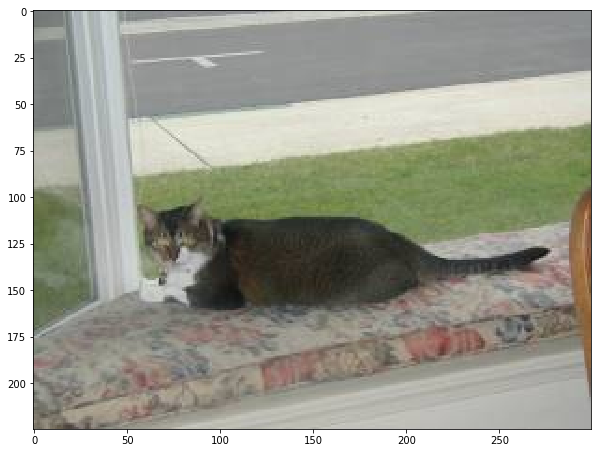

In [246]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()


## Getting blob from input image

In [247]:
blob = cv2.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB=True, crop=False)

print(blob.shape)  # (1, 3, 416, 416)


(1, 3, 416, 416)


(416, 416, 3)


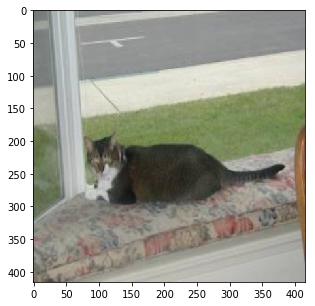

In [248]:

blob_to_show = blob[0, :, :, :].transpose(1, 2, 0)
print(blob_to_show.shape)  # (416, 416, 3)

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.imshow(blob_to_show)
plt.show()

## Implementing forward pass with our blob and only through output layers

In [249]:
network.setInput(blob)
output_from_network = network.forward(layers_names_output)


## Colours for representing every detected object

In [250]:
bounding_boxes = []
confidences = []
class_numbers = []
h = image_input_shape[0]
w = image_input_shape[1]

## Going through all output layers after feed forward and answer from network

In [251]:
for result in output_from_network:
    for detection in result:
        scores = detection[5:]
        class_current = np.argmax(scores)

        confidence_current = scores[class_current]

        if confidence_current > probability_minimum:

            box_current = detection[0:4] * np.array([w, h, w, h])

            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))

            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))

## Implementing non maximum suppression of given boxes and corresponding scores

In [252]:
results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)


## Drawing bounding boxes and labels

In [253]:

for i in range(len(bounding_boxes)):
    x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
    box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]

    colour_box_current = (0, 0, 255)

    cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height),
                  colour_box_current, 2)
    text_box_current = '{:.3f}'.format(confidences[i])
    cv2.putText(image_input, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                1.5, colour_box_current, 2)

## Showing RGB image with bounding boxes and labels

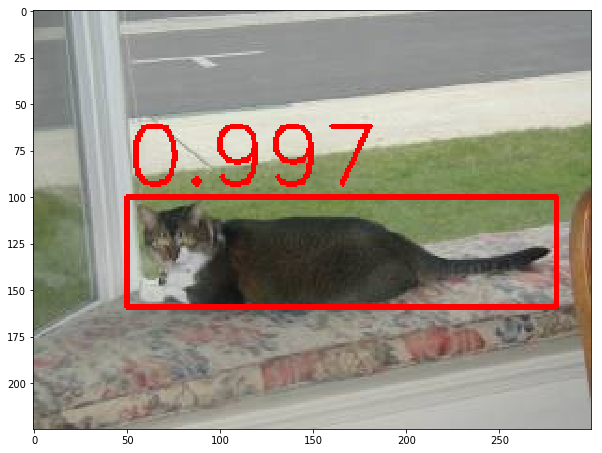

In [254]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()
